<a href="https://colab.research.google.com/github/Gtebaldi1/ANOVA-TEST/blob/main/HHA507_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
import pingouin as pg
from scipy import stats

In [3]:
url1= 'https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/cec0340503d82d270821e03254993b6dede60afb/healthcare-dataset-stroke-data.csv'

In [4]:
df1 = pd.read_csv(url1)
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
list (df1)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

Dependant variable: Stroke

Independant variables: Gender, working status, smoking status, BMI

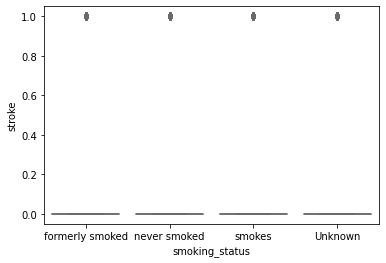

In [10]:
df1_smoking_status_boxplot = sns.boxplot(x='smoking_status', y= 'stroke', data=df1, palette="Set3") 


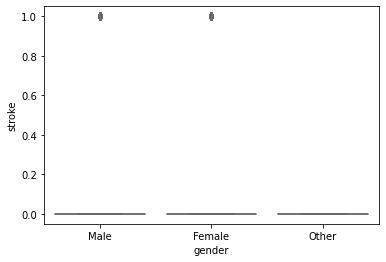

In [60]:
df1_gender_boxplot = sns.boxplot(x='gender', y= 'stroke', data=df1, palette="Set3")

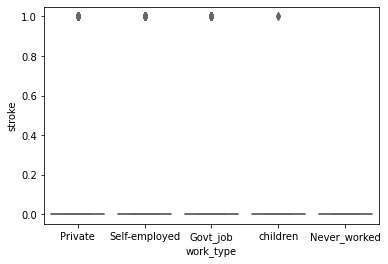

In [61]:
df1_work_type_boxplot = sns.boxplot(x='work_type', y= 'stroke', data=df1, palette="Set3")

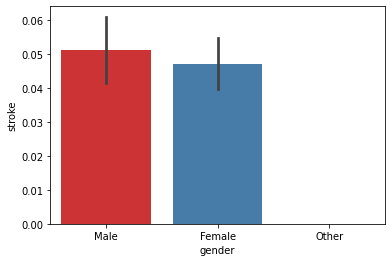

In [17]:
df1_vs_gender = sns.barplot(x='gender', y= 'stroke', data=df1, palette="Set1") 


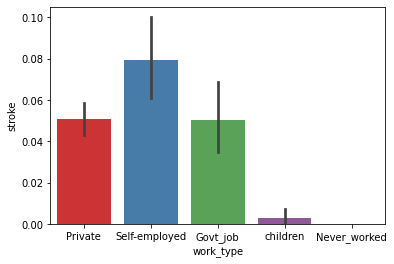

In [21]:
df1_vs_heart_disease = sns.barplot(x='work_type', y= 'stroke', data=df1, palette="Set1") 

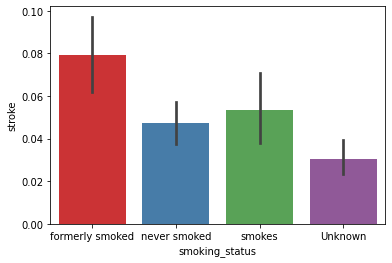

In [19]:
df1_vs_smoking_status = sns.barplot(x='smoking_status', y= 'stroke', data=df1, palette="Set1") 

In [27]:
def rules(row):
  if row['bmi'] >= 30 :
    return 'obese'
  elif row['bmi'] <= 24.9:
    return 'normal weight'
  elif row ['bmi'] > 24.9:
    return 'over weight'

In [28]:
df1['bmi_mod2'] = df1.apply(rules, 1)

In [29]:
df1[['bmi', 'bmi_mod2']]

,bmi,bmi_mod2
0,36.6,obese
1,NaN,None
2,32.5,obese
3,34.4,obese
4,24.0,normal weight
...,...,...
5105,NaN,None
5106,40.0,obese
5107,30.6,obese
5108,25.6,over weight


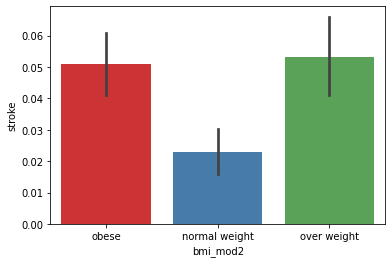

In [30]:
df1_vs_smoking_status = sns.barplot(x='bmi_mod2', y= 'stroke', data=df1, palette="Set1") 

**Create dataframe with only variables using are visible**

In [59]:
workingdf = df1[['stroke', 'gender','smoking_status','work_type', 'bmi_mod2']]
workingdf

,stroke,gender,smoking_status,work_type,bmi_mod2
0,1,Male,formerly smoked,Private,obese
1,1,Female,never smoked,Self-employed,None
2,1,Male,never smoked,Private,obese
3,1,Female,smokes,Private,obese
4,1,Female,never smoked,Self-employed,normal weight
...,...,...,...,...,...
5105,0,Female,never smoked,Private,None
5106,0,Female,never smoked,Self-employed,obese
5107,0,Female,never smoked,Self-employed,obese
5108,0,Male,formerly smoked,Private,over weight


**Value counts for balanced or unbalanced**

In [57]:
gender_counts = workingdf['gender'].value_counts().reset_index()

In [25]:
smoking_status_counts = workingdf['smoking_status'].value_counts().reset_index()

In [33]:
work_type_counts = workingdf['work_type'].value_counts().reset_index()

In [32]:
bmi_mod2_counts = workingdf['bmi_mod2'].value_counts().reset_index()

**1 way A NOVA tests**

Is there significance between the presence of a stroke and age

In [36]:
model = ols('stroke ~ C(gender)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),2.0,0.021906,0.010953,0.236176,0.78965
Residual,5107.0,236.844826,0.046377,NaN,NaN


**No significant difference or result**

Is there a significance between the presence of a stroke and a persons smoking status 

In [37]:
model = ols('stroke ~ C(smoking_status)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(smoking_status),3.0,1.351080,0.450360,9.763844,0.000002
Residual,5106.0,235.515652,0.046125,NaN,NaN


**Significant difference or result.**

Is there a significance between the presence of a stroke and the type of employment a person has

In [38]:
model = ols('stroke ~ C(work_type)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(work_type),4.0,2.278904,0.569726,12.398135,4.904670e-10
Residual,5105.0,234.587828,0.045953,NaN,NaN


**Signicant difference or result**

Is there a significance between the presence of a stroke and the BMI category of a person

In [39]:
model = ols('stroke ~ C(bmi_mod2)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(bmi_mod2),2.0,0.916383,0.458192,11.285402,0.000013
Residual,4906.0,199.185470,0.040600,NaN,NaN


**Significant difference or result**

**Post Comp Tests**

In [52]:
import statsmodels.stats.multicomp as mc

In [53]:
comp1 = mc.MultiComparison(df1['stroke'], df1['gender'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()

In [54]:
comp2 = mc.MultiComparison(df1['stroke'], df1['smoking_status'])
post_hoc_res2 = comp2.tukeyhsd() 
tukeyway2 = post_hoc_res2.summary()

In [55]:
comp3 = mc.MultiComparison(df1['stroke'], df1['work_type'])
post_hoc_res3 = comp3.tukeyhsd() 
tukeyway3 = post_hoc_res3.summary()

In [56]:
comp4 = mc.MultiComparison(df1['stroke'], df1['bmi_mod2'])
post_hoc_res4 = comp4.tukeyhsd() 
tukeyway4 = post_hoc_res4.summary()

TypeError: ignored